In [9]:
from moving_mnist import *
from matplotlib import pyplot as plt

In [26]:
import socket
import torch
import numpy as np
from torchvision import datasets, transforms

class MovingMNIST(object):
    
    """Data Handler that creates Bouncing MNIST dataset on the fly."""

    def __init__(self, train, data_root, seq_len=20, num_digits=2, image_size=64, deterministic=True):
        path = data_root
        self.seq_len = seq_len
        self.num_digits = num_digits  
        self.image_size = image_size 
        self.step_length = 0.1
        self.digit_size = 32
        self.deterministic = deterministic
        self.seed_is_set = False # multi threaded loading
        self.channels = 1 

        self.data = datasets.MNIST(
            path,
            train=train,
            download=True,
            transform=transforms.Compose(
                [transforms.Scale(self.digit_size),
                 transforms.ToTensor()]))

        self.N = len(self.data) 

    def set_seed(self, seed):
        if not self.seed_is_set:
            self.seed_is_set = True
            np.random.seed(seed)
          
    def __len__(self):
        return self.N

    def __getitem__(self, index):
        self.set_seed(index)
        image_size = self.image_size
        digit_size = self.digit_size
        x = np.zeros((self.seq_len,
                      image_size, 
                      image_size, 
                      self.channels),
                    dtype=np.float32)
        loc = np.zeros((self.seq_len, self.num_digits, 2), dtype=np.float32)
        y = np.zeros(self.num_digits, dtype=np.int32)
        for n in range(self.num_digits):
            idx = np.random.randint(self.N)
            digit, label = self.data[idx]
            
            y[n] = label
            sx = np.random.randint(image_size-digit_size)
            sy = np.random.randint(image_size-digit_size)
            dx = np.random.randint(-4, 5)
            dy = np.random.randint(-4, 5)
            for t in range(self.seq_len):
                if sy < 0:
                    sy = 0 
                    if self.deterministic:
                        dy = -dy
                    else:
                        dy = np.random.randint(1, 5)
                        dx = np.random.randint(-4, 5)
                elif sy >= image_size-32:
                    sy = image_size-32-1
                    if self.deterministic:
                        dy = -dy
                    else:
                        dy = np.random.randint(-4, 0)
                        dx = np.random.randint(-4, 5)
                    
                if sx < 0:
                    sx = 0 
                    if self.deterministic:
                        dx = -dx
                    else:
                        dx = np.random.randint(1, 5)
                        dy = np.random.randint(-4, 5)
                elif sx >= image_size-32:
                    sx = image_size-32-1
                    if self.deterministic:
                        dx = -dx
                    else:
                        dx = np.random.randint(-4, 0)
                        dy = np.random.randint(-4, 5)
                   
                x[t, sy:sy+32, sx:sx+32, 0] += digit.numpy().squeeze()
                loc[t, n, 0] = sx+16
                loc[t, n, 1] = sy+16
                sy += dy
                sx += dx

        x[x>1] = 1.
        return x, y, loc




In [46]:
import socket
import numpy as np
from torchvision import datasets, transforms
import torch 

class MovingMNIST(object):
    
    """Data Handler that creates Bouncing MNIST dataset on the fly."""

    def __init__(self, train, data_root, seq_len=20, num_digits=2, image_size=64, deterministic=True):
        path = data_root
        self.seq_len = seq_len
        self.num_digits = num_digits  
        self.image_size = image_size 
        self.step_length = 0.1
        self.digit_size = 32
        self.deterministic = deterministic
        self.seed_is_set = False # multi threaded loading
        self.channels = 1 

        self.data = datasets.MNIST(
            path,
            train=train,
            download=True,
            transform=transforms.Compose(
                [transforms.Scale(self.digit_size),
                 transforms.ToTensor()]))

        self.N = len(self.data) 

    def set_seed(self, seed):
        if not self.seed_is_set:
            self.seed_is_set = True
            np.random.seed(seed)
          
    def __len__(self):
        return self.N

    def __getitem__(self, index):
        self.set_seed(index)
        image_size = self.image_size
        digit_size = self.digit_size
        x = torch.zeros(self.seq_len, self.channels, image_size, image_size, dtype=torch.float32)
        y = torch.zeros(self.num_digits, dtype=torch.int32)
        loc = torch.zeros(self.seq_len, self.num_digits, 2, dtype=torch.float32)
        
        for n in range(self.num_digits):
            idx = np.random.randint(self.N)
            digit, label = self.data[idx]
            
            y[n] = label
            sx = np.random.randint(image_size-digit_size)
            sy = np.random.randint(image_size-digit_size)
            dx = np.random.randint(-4, 5)
            dy = np.random.randint(-4, 5)
            for t in range(self.seq_len):
                if sy < 0:
                    sy = 0 
                    if self.deterministic:
                        dy = -dy
                    else:
                        dy = np.random.randint(1, 5)
                        dx = np.random.randint(-4, 5)
                elif sy >= image_size-32:
                    sy = image_size-32-1
                    if self.deterministic:
                        dy = -dy
                    else:
                        dy = np.random.randint(-4, 0)
                        dx = np.random.randint(-4, 5)
                    
                if sx < 0:
                    sx = 0 
                    if self.deterministic:
                        dx = -dx
                    else:
                        dx = np.random.randint(1, 5)
                        dy = np.random.randint(-4, 5)
                elif sx >= image_size-32:
                    sx = image_size-32-1
                    if self.deterministic:
                        dx = -dx
                    else:
                        dx = np.random.randint(-4, 0)
                        dy = np.random.randint(-4, 5)

                x[t, :, sy:sy+32, sx:sx+32] += digit
                loc[t, n, 0] = sx+16
                loc[t, n, 1] = sy+16
                sy += dy
                sx += dx

        x[x>1] = 1.
        return x, y, loc




In [47]:
dataset = MovingMNIST(train=True, data_root='MNIST', deterministic=False)
# self, train, data_root, seq_len=20, num_digits=2, image_size=64, deterministic=True):

In [48]:
x, y, loc = dataset[0]

In [49]:
print(x.shape, y.shape)

torch.Size([20, 1, 64, 64]) torch.Size([2])


tensor(4, dtype=torch.int32)


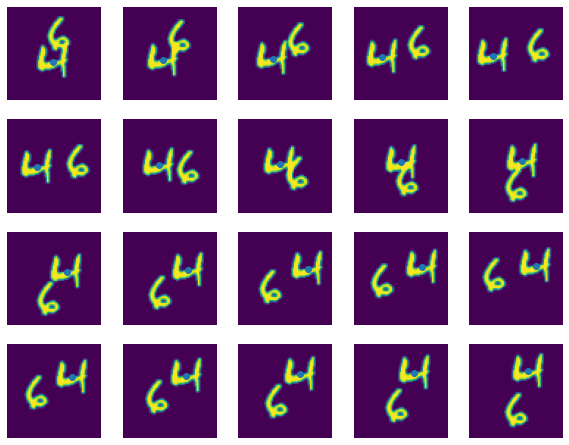

tensor(6, dtype=torch.int32)


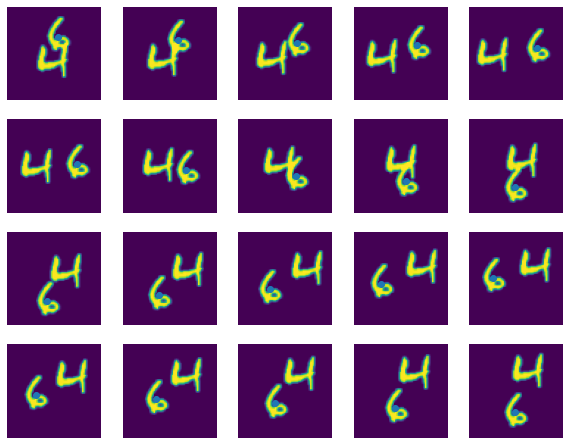

In [51]:

for n in range(2):
    print(y[n])
    plt.figure(figsize=(10, 10))
    for i in range(20):
        plt.subplot(5, 5, i+1)
        plt.imshow(x[i, 0])
        plt.scatter(loc[i, n, 0:1], loc[i, n, 1:2])
        plt.axis('off')
    plt.show()

In [ ]:
# Pretrain some features
